<a href="https://colab.research.google.com/github/Damilare125/SGA_1.4/blob/main/IBM_Employee_Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Employee Attribution Project**

Importing the libraries

In [ ]:
pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
     |████████████████████████████████| 96 kB 4.0 MB/s 
     |████████████████████████████████| 1.6 MB 34.8 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=42a7b34242150f30831f91ae95b002dcbfd5ec3635314288076bac6bc79be869
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
# Standard imports
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set()

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

**•Importing sqlite3, creating a connection to the database and creating a cursor to execute the sqlite.**

In [ ]:
# Import sqlite3
import sqlite3 as sql

# Create a connection to a database
conn = sql.connect("attr_data.db")

# Create a cursor to execute sql
cursor = conn.cursor()

**•Extracting all the data from the table in the database using SQL and importing the data into Pandas showing the first five(5) rows of the table.**

In [ ]:
# Extracting data and importing it to pandas
df = pd.read_sql_query("SELECT * FROM 'attrition_records';", conn)

# Showing the first 5 rows in pandas 
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**•Checking the shape of the data.**

In [ ]:
# Checking the shape (rows and columns) of the data
df.shape

(1470, 36)

**We can see we have 1470 rows and 36 columns in the data on the output above.**

**•Checking the information of the data.**

In [ ]:
# Checking the info of the table dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

**On the output above we can see all the columns consist of integer and object.**

**•Checking the dataset if there is a missing value there.**

In [ ]:
# Checking the missing values in the data
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

**On the output above we can see there isn't any missing value in the dataset.**

**•Checking the description of the data.**

In [ ]:
# Checking the describe of the data.
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**On the output above we can see the count, mean, std(standard deviation), min(minimum value), 25%, 50%, 75% and max(maximum value) of the dataset.**

**QUESTION 1**
• What do you think are the 3 factors behind employee attrition?

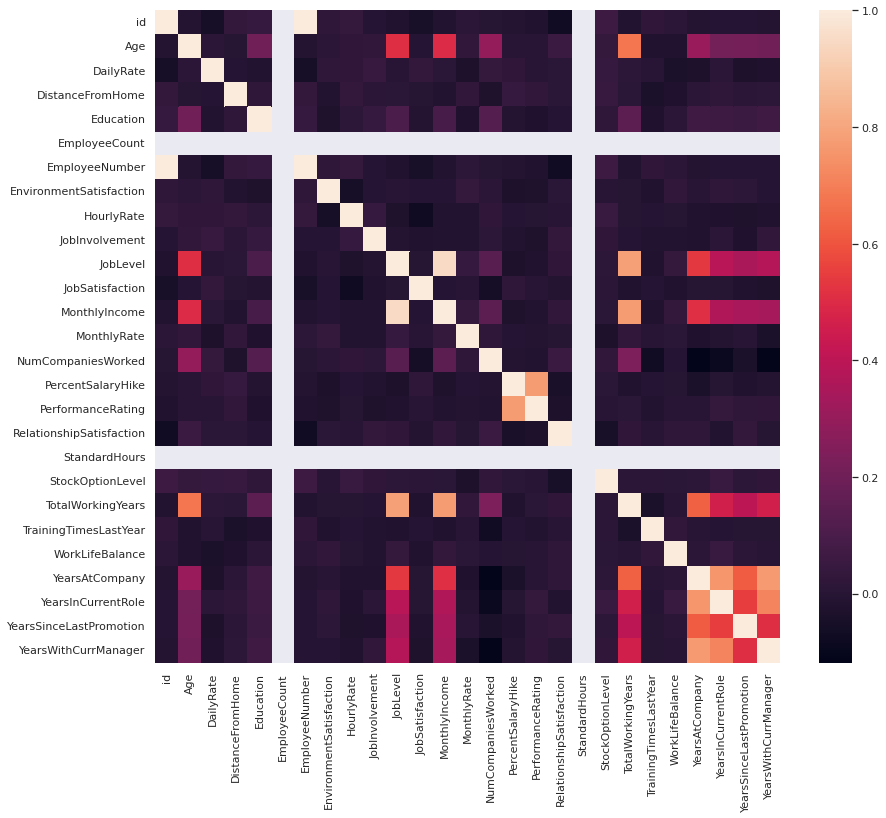

In [ ]:
# get the correlations of the Attrition dataset
corr = df.corr()
# generate heatmap of correlations
plt.figure(figsize=(14,12))
sns.heatmap(corr)
plt.show()

**EXPLANATION:**
On the graph above where we can see the correlations heatmap of attrition record where JOB LEVEL, MONTHLY INCOME and TOTAL WORKING YEARS are of higher activities showing them as the 3 main factors of attrition.

**QUESTION 2**

• What is the relationship between Education and Monthly Income?

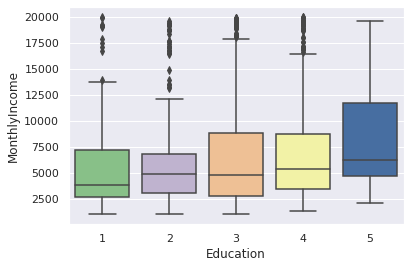

In [ ]:
sns.boxplot(data=df, y='MonthlyIncome', x='Education', palette="Accent") 
plt.show()


**EXPLANATION:**
The boxplot shows the relationship between the Education and Monthly Income where we can see the minimum value, first quartile, second quartile, third quartile, maximum value and the outlier data in the Education, from 1-4 have outliers while 5 don't have any outlier.

**QUESTION 3**

• What is the effect of age on attrition?

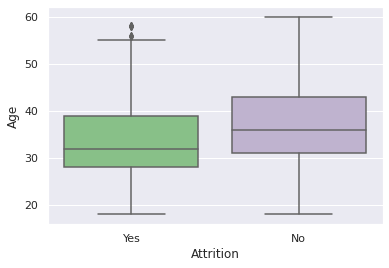

In [ ]:
sns.boxplot(x='Attrition', y='Age', data=df, palette='Accent')
plt.show()

**EXPLANATION**: The boxplot shows the effect of age on attrition whereby it shows Age doesn't really have effect on attrition.

**QUESTION 4**

• Is Income the main factor in employee attrition?

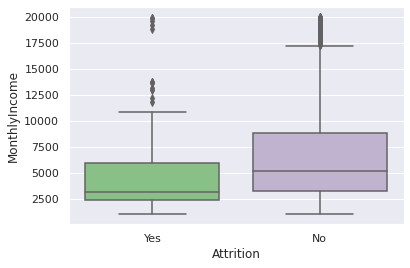

In [ ]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Accent')
plt.show()

**QUESTION 5**

• How does work-life balance impact the overall attrition rate?

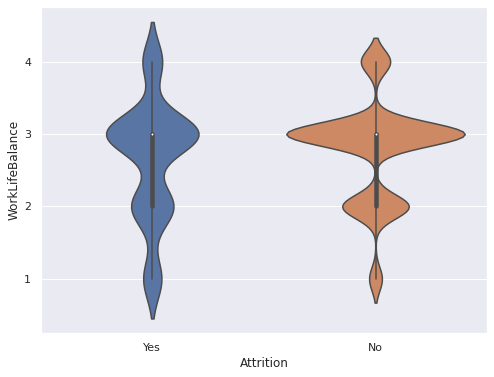

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, y=df['WorkLifeBalance'], x=df['Attrition'])
plt.show()

**EXPLANATION-** Work Life Balance impact the overall attrition because on the graph above we can see most of the employees try to balance their work life, where we can see the median to be 3 out of 4, it shows it impact the overall attrition.